# 지도 학습

<p align="center"><img src="./main.jpg" height="500px" width="750px"></p>

<br>

`머신러닝`은 크게 두 가지 유형으로 나눌 수 있습니다. 데이터와 정답을 비교해나가며 학습해나가는 `지도학습(Supervised Learning)`, 정답 없이 데이터만을 보고 판단하는 `비지도학습(Unsupervised Learning)`이 바로 그것이죠. 오늘 우리는 가장 기본이자 흔한, 그러나 강력한 학습방법인 지도학습에 대해 알아볼 것입니다.  
  
지난 시간 우리는 유방암 데이터를 가지고 양성인지 음성인지 분류하는 모델을 만들어봤습니다. 모델을 만들기 위해 양성인 사람의 데이터와, 음성인 사람의 데이터가 각각 필요했죠. 누구는 음성! 누구는 양성! 이런 식으로, 데이터(누구)와 정답(음성, 양성) 사이의 패턴을 파악하는 것을 **지도학습**이라고 합니다. 
  
생각보다 별 거 아니죠? 맞습니다. 사실 무엇이든지 일단 해보면 생각보다 별 거 아닌 경우가 많죠. 그럼, 지도학습의 큰 방향이라고 할 수 있는 **분류**와 **회귀**에 대해 알아보고, 이들은 어떤 차이가 있는지, 어떻게 만들어낼 수 있는지 알아보도록 해요!

<br>

--- 
**알림**
- 본 컨텐츠는 강의 형식이 아닌, 스스로 공부하시는 분들을 위한 일종의 문제집 입니다.
- 데이터라는 큰 바다에서 여러분이 쓸 데 없는 시간 낭비 없이 바로바로 핵심을 배우실 수 있도록 커리큘럼을 짜봤습니다.
- 이 컨텐츠의 문제들만 해결한다고 실력이 오르지 않습니다. 본 컨텐츠의 목적은 문제를 해결하는 과정에서 발생하는 고민과 질문을 통한 실력 향상입니다. 
- 문제에서 절대 떠먹여주지 않습니다. 물고기를 잡아주는 것이 아닌, 물고기를 잡는 방법을 여러분이 이 컨텐츠를 통해 알아가셨으면 합니다.

## 1-1 종류 파악 (회귀와 분류의 차이점)
위에서 말씀 드렸다 싶이, 지도학습은 크게 회귀와 분류로 나눌 수 있습니다. 그럼 이 둘의 차이를 알고 가는 게 중요하겠죠? 

[이곳](https://opentutorials.org/course/4548/28942)에서 분류와 회귀에 대한 설명을 확인하신 뒤, 알게된 내용을 정리해주세요! 그리고 아래의 간단한 퀴즈를 풀어주세요 👀  
정답이라면 왜 정답인지, 틀리면 어디서 틀렸는지도 말씀해주세요!

<br>

### ❌미니 문제⭕
1. 분류는 정답 데이터(Label)이 있는 것을 의미하고, 회귀는 정답 데이터가 없는 것을 의미한다. (O, X)
2. 분류는 정답값이 범주형(Categorical)으로 이루어져 있고, 회귀는 정답값이 연속형(Continuous)으로 이루어져 있다. (O, X)

답안 : 1. X (이는 분류와 회귀가 아닌, supervised와 unsupervised에 해당되는 설명이다.) 2. O

## 1-2 분류 실습
간단하게 복습도 해볼겸, 지난시간 해봤던 유방암 분류를 한번 다시 따라가봅시다.  
  
아래 코드의 빈칸에 적절한 코드를 입력해주세요!
```python
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

wine_X, wine_y = load_breast_cancer(return_X_y=True, as_frame=True)

dataset = pd.concat([wine_X, wine_y], axis=1)
target1 = dataset[dataset['target'] == 1]
resampled = dataset[dataset['target'] == 0].sample(20)
imbalanced_dataset = pd.concat([target1, resampled], axis=0)
print(f"불균형 이전 target 분포 :\n {dataset['target'].value_counts()}")
print(f"불균형 이후 target 분포 :\n {imbalanced_dataset['target'].value_counts()}")

X_train, X_val, y_train, y_val = """HERE YOUR CODE"""(imbalanced_dataset.drop(['target'], axis=1), imbalanced_dataset['target'], test_size=0.2, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler."""HERE YOUR CODE"""(X_train)
scaled_X_val = scaler."""HERE YOUR CODE"""(X_val)

classifier = RandomForestClassifier()
classifier."""HERE YOUR CODE"""(X_train, y_train)
preds = classifier."""HERE YOUR CODE"""(X_val)

print("👀 Wine 분류 결과...")
print(classification_report(preds, y_val))
```

<br>

검색 힌트: sklearn fit, sklearn fit_transform, sklearn predict

<br>

_예시_  
![](./1-2answer.png)

In [3]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

wine_X, wine_y = load_breast_cancer(return_X_y=True, as_frame=True)

dataset = pd.concat([wine_X, wine_y], axis=1) # 옆으로 concat
target1 = dataset[dataset['target'] == 1]
resampled = dataset[dataset['target'] == 0].sample(20) # targetdl 0인 행 중 20개 추출
imbalanced_dataset = pd.concat([target1, resampled], axis=0) # 아래로 concat
print(f"불균형 이전 target 분포 :\n {dataset['target'].value_counts()}")
print(f"불균형 이후 target 분포 :\n {imbalanced_dataset['target'].value_counts()}")

X_train, X_val, y_train, y_val = train_test_split(imbalanced_dataset.drop(['target'], axis=1), imbalanced_dataset['target'], test_size=0.2, random_state=42)

scaler = StandardScaler() # 데이터 단위 통일
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
preds = classifier.predict(X_val)

print("👀 Wine 분류 결과...")
print(classification_report(preds, y_val))

불균형 이전 target 분포 :
 1    357
0    212
Name: target, dtype: int64
불균형 이후 target 분포 :
 1    357
0     20
Name: target, dtype: int64
👀 Wine 분류 결과...
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.97      0.99      0.98        70

    accuracy                           0.96        76
   macro avg       0.89      0.83      0.85        76
weighted avg       0.96      0.96      0.96        76



## 1-3 Classification Metrics
위의 분류 결과를 보니, 정확도를 의미하는 `accuracy`외에 `precision`, `recall`, `f1-score`와 같은 지표를 확인할 수 있습니다. 이게 무엇을 의미할까요?  
  
사실 분류 문제에서 정확도는 모델의 성능을 충분하게 나타내는 만능 지표가 되지 못합니다. 직관적으로 잘 와닿지 않죠? 아니 얼마나 잘 맞췄는지를 알려주는 정확도가 왜 만능 지표가 되지 못한다는 걸까요?
  
만약 여러분이 시험을 친다고 해봅시다. 시험은 100문제 중, 90문제의 정답이 1이고, 10문제의 정답이 0입니다.  
  
> 성실한 여러분들은 문제를 다 고심하고 푸신 끝에 아, 90문제 정도가 정답이 1이고, 10문제가 정답이 0이구나~ 하고 OMR을 제출하고 90점의 점수를 받았습니다. 좋은 성적이죠.  
> 그러나 옆자리에 앉은 불성실한 친구는 그냥 답을 전부 1로 찍고 잠들었습니다. 이 친구의 정확도 성적은 어떻게 나왔을까요?  
  
맞습니다. **여러분과 똑같은 90점을 받게 됩니다.**  
  
이렇듯, 데이터가 불균형한 경우, 정확도는 좋은 지표가 될 수 없습니다. 대충 많은 target으로 찍으면 정확도는 높게 나올 수 있거든요.  
그래서 **`좀 더 세밀한 지표가 필요합니다`**  그것들이 바로, 이제부터 여러분이 공부해볼 `precision`, `recall`, `f1-score`의 개념입니다.  
  
<br>
  
### 문제
구글에 `classification metrics`를 검색한 후, 각각에 대해 정리한 내용을 아래에 간략하게 적어주세요!  <br>
**precision** : 모델이 x라고 분류한 것 중 실제 x인 비율 <br>
**recall** :  실제 x 중 모델이 x라고 분류한 비율<br>
**f1-score** :   precision과 recall의 조화평균<br>
**ROC-AUC** :   ROC curve는 이진 분류기의 성능을 표현하는 커브이며, 이의 아래 면적을 AUC라고 한다.
  
<br>

간단하게 적어주시면 되며, 본인이 이해한 내용 그대로 적어주시면 됩니다 :)

## 1-4 불균형이 적은 경우
우리가 방금 실습해본 경우는 target 간의 불균형이 매우 심한 상태였습니다.  
1은 357인데 0은 20이라니.. 하지만 현실은 더 한 경우가 많죠 ㅠㅠ   
  
이러나 저러나 아무튼 target의 불균형이 모델의 성능에 있어 얼마나 많은 영향을 주는지 알아봅시다.  
불균형을 강제로 준 데이터가 아닌, 본래의 데이터로 학습을 시켰을 때 차이를 확인해보면 다음과 같습니다.  
```python
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

wine_X, wine_y = load_breast_cancer(return_X_y=True, as_frame=True)

dataset = pd.concat([wine_X, wine_y], axis=1)

X_train, X_val, y_train, y_val = train_test_split(dataset.drop(['target'], axis=1), dataset['target'], test_size=0.2, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
preds = classifier.predict(X_val)

print("👀 Wine 분류 결과...")
print(classification_report(preds, y_val))
```
_**output**_  
![](./1-4example.png)

<br>

오! 아까와는 다르게 `accuracy`외의 다른 지표도 높은 수준으로 나왔습니다.  
불균형은 이토록, 모델의 성능에 있어 큰 영향을 준답니다.  

<br>

실전에선 어떻게 불균형을 해소시킬까요? 크게 2가지 방법이 있습니다. 바로 `Over Sampling`과 `Under Sampling`이죠.  

<br>

`Over Sampling`은 쉽게 말해, 부족한 데이터를 늘려 균형을 맞추는 겁니다. 예를 들어, 멍멍이와 고양이를 분류할 때, 멍멍이 사진은 100장, 고양이 사진은 10장이 있다고 해봅시다. 멍멍이 사진은 엄청 많은데 고양이 사진은 너무 적습니다. 이런 경우, 고양이의 사진을 더 구해오거나 약간의 변형을 주어 고양이 사진을 100장으로 늘려줍니다. ~~(나중에 딥러닝에 들어가시면 `Augmentation`을 배우실 거예요!)~~  
`Under Sampling`은 반대로, 멍멍이 사진을 10장으로 줄여 데이터의 균형을 맞추는 것입니다. 멍멍이 사진 100장 중, 랜덤으로 10개를 뽑아도 되고, 가장 잘 나온 사진 10개를 추출해도 됩니다.  
  
위와 같이, 데이터간의 균형을 어떻게 맞추느냐에 따라서 모델의 성능이 크게 좌우되기도 합니다. 직관적으로는 데이터의 양도 늘고, 균형도 맞출 수 있는 일석이조의 `Over Sampling`이 좋아보이지만, 한편으로 생각해보면 _억지로 늘린 데이터가 정말 학습에 좋을까,,?_ 하는 의문이 들기도 하죠. 반대로 `Under Sampling`은 데이터의 양이 충분이 많으면 상관 없겠으나(멍멍이 사진 1,000,000장, 고양이 사진 100,000장) 두 target 모두 적은 경우엔? 데이터 하나하나가 아까운 상황에서 뭘 버릴지도 굉장히 큰 고민이 될것입니다.  
  
> 결론: 데이터 상황과 분석 목적에 맞는 기법을 선택해야 한다!
  
그럼 간단하게 실습을 진행해볼게요!  

<br>

### 문제
아래 코드에서 적절한 메소드를 입력하여 코드를 완성해주세요!  
❗ `!pip install imbalanced-learn`을 통해 해당 라이브러리를 설치해주세요! ❗  

<br>

```python
import pandas as pd
from sklearn.datasets import load_breast_cancer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

wine_X, wine_y = load_breast_cancer(return_X_y=True, as_frame=True)

original_dataset = pd.concat([wine_X, wine_y], axis=1)

print("✅ Class Distribusion before Sampling")
print(dataset['target'].value_counts())

print()
print("👀 Over Sampling")
X_over, y_over = RandomOverSampler(random_state=42)."""HERE YOUR CODE"""(wine_X, wine_y)
over_dataset = pd.concat([X_over, y_over], axis=1)
print(over_dataset['target'].value_counts())

print()
print("👀 Under Sampling")
X_under, y_under = RandomUnderSampler(random_state=42)."""HERE YOUR CODE"""(wine_X, wine_y)
under_dataset = pd.concat([X_under, y_under], axis=1)
print(under_dataset['target'].value_counts())
```

<br>

검색 힌트: imblearn fit_sample

<br>

_예시_  
![](./1-4answer.png)

<br>

📌추가 학습📌(궁금한 사람만 하기!)  
Over Sampling은 랜덤으로 더 데이터를 추가하는 게 최선일까요?  
Over Sampling엔 어떤 기법들이 있는지 한번 알아보겠습니다. 아래의 키워드를 검색해서 각 기법을 요약해봅시다.  
> SMOTE :   
>    
> ADASYN :  
>   

In [1]:
!pip install imbalanced-learn

     -------------------------------------- 226.0/226.0 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

wine_X, wine_y = load_breast_cancer(return_X_y=True, as_frame=True)

original_dataset = pd.concat([wine_X, wine_y], axis=1)

print("✅ Class Distribusion before Sampling")
print(dataset['target'].value_counts())

print()
print("👀 Over Sampling")
X_over, y_over = RandomOverSampler(random_state=42).fit_resample(wine_X, wine_y)
over_dataset = pd.concat([X_over, y_over], axis=1)
print(over_dataset['target'].value_counts())

print()
print("👀 Under Sampling")
X_under, y_under = RandomUnderSampler(random_state=42).fit_resample(wine_X, wine_y)
under_dataset = pd.concat([X_under, y_under], axis=1)
print(under_dataset['target'].value_counts())

✅ Class Distribusion before Sampling
1    357
0    212
Name: target, dtype: int64

👀 Over Sampling
0    357
1    357
Name: target, dtype: int64

👀 Under Sampling
0    212
1    212
Name: target, dtype: int64


## 2-1 회귀?
지도학습엔 분류와 `회귀`가 있다고 했죠? 사실 회귀는 통계학의 정말 정말 정말 큰 기둥 중에 하나입니다. 그만큼 오랜 역사와 증명, 가치가 인정되고 사용되고 있습니다.  
회귀를 사용하여 문제를 풀어보기 전에, 일단 회귀가 무엇인지 알아봐야겠죠? 위에서 target이 연속형이면 회귀라고 했던 거 같은디... 처럼 대충 알아도 실습을 하는 데에는 문제가 없지만 
> 실제 문제를 해결할 때 매우 난감할 수 있습니다! 회귀는 그만큼 정말 중요한 개념이니, 한번쯤은 구글이나 유튜브에 검색을 해보신 후, 쭉 보고 가시는 걸 추천드려요 ([추천 강의](https://youtu.be/THi6ZBoAKQY))
  
![](./regression_example.svg)
  
우리는 수많은 데이터를 가지고 있습니다. 이 데이터들을 한번 그려놓고 보니, 뭔가 데이터들을 표현할 수 있는 선을 그려낼 수 있을 것같습니다. 그 선을 최대한 잘 그리는 것. 어떻게 보면 그걸 회귀라고 할 수 있겠습니다.  
  
이 부분은 통계에 대한 내용이므로 사실 깊게 다루지는 않을 것이고, 그냥 이렇구나~ 정도로만 알고 넘어가시면 좋을 것같습니다. 깊게 알고 싶으신 분들은 통계를 공부해보시는 걸 추천드려요! 정말 재밌습니다. 

## 2-2 회귀의 Metrics 알아보기
분류에선, 얼마나 잘 맞췄는지를 기준으로 모델의 성능을 평가했습니다. 그럼 회귀 모델의 성능 평가는 어떻게 할 수 있을까요?  
사실 회귀는 그 역사가 정말 오래된 만큼, 다양한 성능 지표가 있습니다. 하지만 결국 모든 건 하나로 이어지죠. 바로  
  
`예측값과 실제값의 차이`를 기준으로 합니다.  
  
모델이 예측한 값과 실제 정답값과의 차이를 `Loss`라고 하는데요, 우리의 목표는 이 Loss가 가장 적은(=실제 값과 제일 비슷한) 모델을 만드는 게 목표입니다.  
이 직관은 나중에 딥러닝에서 매우 중요하게 작용하니, 헷갈리시는 분들은 **Loss... 작은 거 짱...** 정도로 알고 가셔도 좋을 거 같습니다 ㅎㅎ   
  

### 문제
아래 적혀있는 지표들이 무엇을 의미하는지 적어주세요! 너무 긴 설명은 필요 없습니다. 여러분이 이해하신 언어 그대로를 적어주세요!  
> **MAE** :   Mean Absolute Error
> 
> **MSE** :  Mean Squared Error
>  
> **RMSE** :  Root Mean Squared Error
>   
> **R^2** :   R Squared Score - 값이 클수록 정확

## 2-3 회귀 수행해보기
회귀가 무엇인지 알았고, 어떻게 모델의 성능을 측정하는지도 알았으니 이제 한번 회귀 모델을 만들어보겠습니다.  
  
회귀라고 해서 분류와 크게 다르지 않습니다. 친절한 `sklearn`은 감사하게도 좋은 모델들을 다 구현해놨고, 우리는 `fit`이라고 적는 것만으로도 학습을 시킬 수 있게 됐죠.  
  
### 문제
가장 간단한 모델인 `Linear Regressor`로 회귀를 시켜보고, 모델의 결과를 확인해볼게요.  
아래의 baseline 코드에서 비어있는 부분을 채워서 코드를 완성시킨 뒤, 모델의 결과를 확인해주세요!   
추가로, 모델의 성능을 더 향상시킬 수 있는 방법은 무엇이 있을지도 간단하게 적어주세요.



<br>

```python
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import """HERE YOUR CODE"""
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X, y = load_diabetes(return_X_y=True, as_frame=True)
dataset = pd.concat([X, y], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

reg = """HERE YOUR CODE"""
reg.fit(X_train, y_train)
preds = reg.predict(X_val)

plt.plot(range(len(y_val)), preds, label="preds")
plt.plot(range(len(y_val)), y_val, label="True")
plt.legend()
plt.show()

regression_report(preds, y_val)
```

<br>

검색 힌트 : sklearn linear regression

<br>

_예시_  
![](./2-3answer.png)

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from tabulate import tabulate

## 이 코드도 함께 실행시켜주세요!
def regression_report(preds, true):
    r2 = r2_score(true, preds)
    mae = mean_absolute_error(true, preds)
    mse = mean_squared_error(true, preds)
    rmse = np.sqrt(mse)

    tmp_df = pd.DataFrame({
        'R-squared': [r2],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse]
    })
    
    print('\033[92m' + '\033[1m' + '📃Regression Report📃' + '\033[0m')
    print(tabulate(tmp_df, headers='keys', tablefmt='psql'))

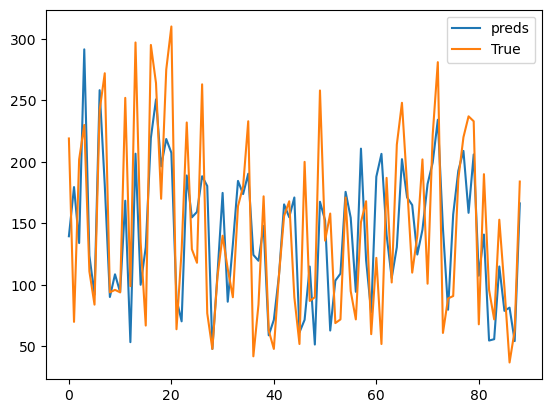

📃Regression Report📃
+----+-------------+---------+---------+---------+
|    |   R-squared |     MAE |     MSE |    RMSE |
|----+-------------+---------+---------+---------|
|  0 |    0.452607 | 42.7939 | 2900.17 | 53.8533 |
+----+-------------+---------+---------+---------+


In [15]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X, y = load_diabetes(return_X_y=True, as_frame=True)
dataset = pd.concat([X, y], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
preds = reg.predict(X_val)

plt.plot(range(len(y_val)), preds, label="preds")
plt.plot(range(len(y_val)), y_val, label="True")
plt.legend()
plt.show()

regression_report(preds, y_val)

모델의 성능을 더 향상시킬 수 있는 방법
- Gradient Descent로 Loss를 최소화시키기
- regularization으로 overfitting 방지하기

# 6주차 종료
6주차를 수행하신 여러분 너무 고생 많으셨습니다 ㅎㅎ 난이도를 낮추고, 비교적 개념위주로 많이 컨텐츠를 구성해봤습니다. 앞으로 남은 주차는 이런 정도의 난이도로 진행될 거 같네요 ㅎㅎ  
지도 학습은 말 그대로, 정답값이 있는 경우입니다. 이렇게 정답이 있는 경우에서, 분류를 수행할지 회귀를 수행할지, 그것을 어떻게 수행할지 정도만 생각해도 여러분 키 만큼의 논문이 쌓여버리죠. 그만큼 정말 깊고, 넓은 분야입니다.  
현실은 어떨까요? 정말 다행이게도, 깔끔한 데이터와 깔끔한 정답값이 있는 경우면 룰루랄라 하면서 우리가 배운 대로 하면 되겠지만 현실의 데이터는 그렇게 말랑하지가 않습니다. (공공데이터만 봐도 그랬죠?)  
정답값이 틀리게 매칭 되어 있는 경우가 있을 것이고, `정답값이 아예 없는 경우가 있을 겁니다`

<br>

다음 주차엔, 정답값이 아예 없는 경우인 `비지도 학습`에 대해 알아보겠습니다. 이번 주차처럼, 최대한 쉽고 여러분들이 부담가지지 않을 코드로 진행하겠습니다!  
고생많이하셨어요!! 다음에 봐요!🚀🚀

# 마무리 숙제
우리는 가장 지금까지 간단한 예시로 간단한 모델을 사용해왔습니다. 물론 `RandomForest`나 `LinearRegreesion`도 매우 중요하고 좋은 모델이지만 더 다양한 모델을 쓸 수 있으면 써보는 것도 나쁘지 않습니다.  
**위의 예시에서 사용한 데이터셋을 기반으로, `분류`와 `회귀`에서 각각 우리가 사용했던 모델이 아닌 다른 모델을 사용하고, 그 성능을 비교한 것을 WIL과 함께 올려주세요!**
  
이런 모델을 사용해볼 수 있을 거 같아요! 
> `XGBoost`, `LightGBM`, `CatBoost` 
  


In [8]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 9.9 MB/s eta 0:00:00


In [16]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_val)
regression_report(y_pred, y_val)

📃Regression Report📃
+----+-------------+---------+---------+---------+
|    |   R-squared |     MAE |     MSE |    RMSE |
|----+-------------+---------+---------+---------|
|  0 |    0.228322 | 50.4051 | 4088.47 | 63.9411 |
+----+-------------+---------+---------+---------+
